#**Term Project:- Walmart Sales Prediction**
#**Semester:- Fall 2023**
#**Subject:- Machine Learning**






#**Project Summary**
**This project is about the weekly sales prediction of 45 Walmart Stores given in the datasets. We are applying various regression models to predict sales as precisely as possible by analyzing the R-square value for the models and other statistical measures such as MAPE, RMSE, and MAE. This project is a regression task, not a classification so, we will replace the accuracy score with the R-square value, as the accuracy score is not applicable here as were are predicting float values. The dataset does not have much information about the stores and their locations we only have features such as weekly dates, weekly sales, average temperature of the week, CPI, Department, Size of the store or department, and many other features. Our goal is to get an R-square value as high as possible without overfitting the model. We need to perform several tests to avoid overfitting the model. The final results will prove the validation of the project whether we achieved our goal or not.**


In [ ]:
import pandas as pd
import numpy as np
import io
import os
from warnings import filterwarnings
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
## Moutn drive with google collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## import csv files form google drives
file_path1 = '/content/drive/MyDrive/ML_project/walmart sales/train.csv'
file_path2 = '/content/drive/MyDrive/ML_project/walmart sales/features.csv'
file_path3 = '/content/drive/MyDrive/ML_project/walmart sales/stores.csv'

## read the CSV files
train= pd.read_csv(file_path1)
features = pd.read_csv(file_path2)
stores = pd.read_csv(file_path3)




#**Details of the data sets we are using**

**The project has 3 data sets with different number of rows and columns.**
**The data sets with their dimensions are**

**1. `Train.csv--------- (421570, 5)`**

**2. `features.csv------ (8190, 12)`**

**3. `Stores.csv-------- (45, 3)`**

**We obtained these datasets from kaggle.com and also it is easily available in other websites too. In this project we are importing the data sets one by one and taking care of the missing values of the datasets and or any preprocessing needed by individual datasets respectively before we start to merge them. The ultimate goal is to merge these 3 data sets and start the final modeling process that was proposed in our project proposal description. During the project, we might apply some steps together as per need.**
#**Steps and processes**
 **The steps we are following in this projects are as follows:**

 **1. Data Cleaning, pre-processing**

 **2. Exploratory data analysis**

 **3. Feature Engineering and Transformation**

 **4. Statistical analysis and Baseline**

 **5. Visualize some relation or correlations**

 **6. Features optimization or scaling and hyperparameters tuning.**

 **7. Implement the models proposed in the project description
    which are the Generative Model and Tree-based model, also if possible RNN.**

 **8. If any proposed model doesn't seem to be applicable,
    explain the reason.**

 **9. Model evaluation and analysis**

 **10. Compare the results and derive the conclusion**

 **11. Report writing and presentation**   





##**1. Data Cleaning and Preprocessing   2. Exploratory data analysis 3. Feature Engineering and Transformation**


**In this process, we are applying combined processes 1, 2, and 3 as they are related to each other. , In this process, we are not applying one hot encoding, as the missing values don't seem to be huge. We will be applying the regular factorize method to replace categorical values with numerical values such as replacing `Type` column values `A, B, and C with 1,2, and 3. we will replace boolean values with binary values  0 and 1. The dataset `features` has all columns with missing values. We need to take care of these missing values before applying merge with another data set.  The columns with missing values are numeric columns with quantity measurement or some ratio, so, we are applying statistical value replacement methods such as applying `mean, median, or mode to replace with missing values`.  We are applying statistical approaches for columns like `CPI and Unemployment`.**

In [ ]:
## Print the train dataset
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
## print features dataset
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
## Let's handle missing values for the features dataset before we go for training
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

**MarkDown seems related to seasonal promotions or sales, we see values for markdown for a particular season and null for the rest of the year. We will combine all the markdown columns into one and after that, we will replace the NaN values with 0.0 as the values are not missing rather NaN suggests that there are no MarkDowns for the rest of the year.**

In [ ]:
## combined all the markdowns.... as MarkDown and remove the original markdown1, markdown2,....... markdown5 columns
features['MarkDown'] = features['MarkDown1'] + features['MarkDown2'] + features['MarkDown3'] + features['MarkDown4'] + features['MarkDown5']
features.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)




In [ ]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,MarkDown
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,NaN
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,NaN


In [ ]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
CPI              585
Unemployment     585
IsHoliday          0
MarkDown        5670
dtype: int64

In [ ]:
## Since Markdown is for seasonal promotions let's replace NaN values for other months with 0.0
features['MarkDown'].fillna(0.0, inplace=True)

In [ ]:
##Lest take mean for CPI values for missing
features['CPI'].fillna(features['CPI'].mean(), inplace=True)

In [ ]:
##lets take mean for unemployed missing values
features['Unemployment'].fillna(features['Unemployment'].mean(), inplace=True)

In [ ]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
MarkDown        0
dtype: int64

In [ ]:
##Now, we are ready for further exploration

In [ ]:
## print the stores' dataset
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
train.info(), stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


(None, None)

In [ ]:
## Merge train and stores dataset based on  `Store`
train_stores = pd.merge(train,stores, on="Store", how="left")


In [ ]:
## Display the merged dataset
train_stores.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315


In [ ]:
## Print the size of the dataset
train_stores.shape

(421570, 7)

In [ ]:
#3 Display the unique values of `Store` columns
train_stores['Store'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
## display the info
train_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 22.9+ MB


In [ ]:
## Merge the train_stores dataset with the features dataset based on Stores,Date and IsHoliday
sales_dataset= pd.merge(train_stores, features,how="left",on = ['Store','Date', "IsHoliday"])

In [ ]:
## display the new merged dataset
sales_dataset=sales_dataset.sort_values(by=["Store","Dept",  "Date"])

In [ ]:
## print the shape of the merged dataset
sales_dataset.shape

(421570, 12)

In [ ]:
## print the columns of the merged dataset
sales_dataset.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown'],
      dtype='object')

In [ ]:
## Print the info
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  MarkDown      421570 non-null  float64
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 39.0+ MB


In [ ]:
sales_dataset.shape

(421570, 12)

In [ ]:
sales_dataset.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,0.0
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,0.0


In [ ]:
##Change type values A, B, and C to 1, 2 and 3
sales_dataset['Type'] = sales_dataset['Type'].map({'A': 1, 'B': 2, 'C': 3})

In [ ]:
sales_dataset.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,211.096358,8.106,0.0
1,1,1,2010-02-12,46039.49,True,1,151315,38.51,2.548,211.242170,8.106,0.0


In [ ]:
## Replace IsHoliday with numeric type
sales_dataset['IsHoliday'] = sales_dataset['IsHoliday'].map({True: 1, False: 0})
sales_dataset.dtypes


Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday         int64
Type              int64
Size              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
MarkDown        float64
dtype: object

In [ ]:
## Lest convert date into date time stand
sales_dataset['Date'] = pd.to_datetime(sales_dataset['Date'])
sales_dataset.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
Type                     int64
Size                     int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
MarkDown               float64
dtype: object

In [ ]:
## Lets extract years, months, weeks and days from the date column
sales_dataset['Year'] = sales_dataset['Date'].dt.year
sales_dataset['Month'] = sales_dataset['Date'].dt.month
sales_dataset['Week'] = sales_dataset['Date'].dt.week
sales_dataset['Day'] = sales_dataset['Date'].dt.day
sales_dataset.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,0.0,2010,2,5,5
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,0.0,2010,2,6,12


#**4.Statistical analysis and Baseline**

In [ ]:
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  MarkDown      421570 non-null  float64       
 12  Year          421570 non-null  int64         
 13  Month         421570 non-null  int64         
 14  Week          421570 non-null  int64         
 15  Day           421

In [ ]:
## Print the statistical measures for the final data set
sales_dataset.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown,Year,Month,Week,Day
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,1.589912,136727.915739,60.090059,3.361027,171.201947,7.960289,5453.612904,2010.968591,6.449510,25.826762,15.673131
std,12.785297,30.492054,22711.183519,0.255750,0.666337,60980.583328,18.447931,0.458515,39.159276,1.863296,14423.202578,0.796876,3.243217,14.151887,8.753549
min,1.000000,1.000000,-4988.940000,0.000000,1.000000,34875.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,2010.000000,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,0.000000,1.000000,93638.000000,46.680000,2.933000,132.022667,6.891000,0.000000,2010.000000,4.000000,14.000000,8.000000
50%,22.000000,37.000000,7612.030000,0.000000,1.000000,140167.000000,62.090000,3.452000,182.318780,7.866000,0.000000,2011.000000,6.000000,26.000000,16.000000
75%,33.000000,74.000000,20205.852500,0.000000,2.000000,202505.000000,74.280000,3.738000,212.416993,8.572000,0.000000,2012.000000,9.000000,38.000000,23.000000
max,45.000000,99.000000,693099.360000,1.000000,3.000000,219622.000000,100.140000,4.468000,227.232807,14.313000,160510.610000,2012.000000,12.000000,52.000000,31.000000


In [ ]:
## Creating new features with some of the statistical values
sales_dataset1 = sales_dataset.groupby(['Store', 'Dept']).Weekly_Sales.agg(['mean', 'median', 'std', "min", "max", "var"]).reset_index()
sales_dataset1


,Store,Dept,mean,median,std,min,max,var
0,1,1,22513.322937,18535.480,9854.349032,14537.37,57592.12,9.710819e+07
1,1,2,46102.090420,45561.850,3440.673222,35819.83,65615.36,1.183823e+07
2,1,3,13150.478042,10366.850,8708.978853,6165.73,51159.17,7.584631e+07
3,1,4,36964.154476,36579.960,2930.698313,32497.43,47893.23,8.588993e+06
4,1,5,24257.941119,21183.420,11330.286495,11570.27,85676.09,1.283754e+08
...,...,...,...,...,...,...,...,...
3326,45,94,3690.272090,4120.155,1852.287364,0.98,7639.88,3.430968e+06
3327,45,95,52896.166643,52417.470,5117.961708,41131.42,75204.77,2.619353e+07
3328,45,96,2.970000,2.970,0.042426,2.94,3.00,1.800000e-03
3329,45,97,6466.961888,6470.520,659.739542,4935.60,8765.09,4.352563e+05


In [ ]:
sales_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Store   3331 non-null   int64  
 1   Dept    3331 non-null   int64  
 2   mean    3331 non-null   float64
 3   median  3331 non-null   float64
 4   std     3294 non-null   float64
 5   min     3331 non-null   float64
 6   max     3331 non-null   float64
 7   var     3294 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 208.3 KB


In [ ]:
## Merging the statistical dataset with final merged dataset
final_data = pd.merge(left=sales_dataset,right=sales_dataset1,on=['Store', 'Dept'],how ='left')
## drop the null values form the dataset
final_data.dropna(inplace=True)
final_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,...,Year,Month,Week,Day,mean,median,std,min,max,var
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,...,2010,2,5,5,22513.322937,18535.48,9854.349032,14537.37,57592.12,9.710819e+07
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,...,2010,2,6,12,22513.322937,18535.48,9854.349032,14537.37,57592.12,9.710819e+07
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,211.289143,...,2010,2,7,19,22513.322937,18535.48,9854.349032,14537.37,57592.12,9.710819e+07
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,211.319643,...,2010,2,8,26,22513.322937,18535.48,9854.349032,14537.37,57592.12,9.710819e+07
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,211.350143,...,2010,3,9,5,22513.322937,18535.48,9854.349032,14537.37,57592.12,9.710819e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,...,2012,9,39,28,561.239037,619.41,371.286705,2.00,1504.71,1.378538e+05
421566,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,...,2012,10,40,5,561.239037,619.41,371.286705,2.00,1504.71,1.378538e+05
421567,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,...,2012,10,41,12,561.239037,619.41,371.286705,2.00,1504.71,1.378538e+05
421568,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,...,2012,10,42,19,561.239037,619.41,371.286705,2.00,1504.71,1.378538e+05


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421533 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421533 non-null  int64         
 1   Dept          421533 non-null  int64         
 2   Date          421533 non-null  datetime64[ns]
 3   Weekly_Sales  421533 non-null  float64       
 4   IsHoliday     421533 non-null  int64         
 5   Type          421533 non-null  int64         
 6   Size          421533 non-null  int64         
 7   Temperature   421533 non-null  float64       
 8   Fuel_Price    421533 non-null  float64       
 9   CPI           421533 non-null  float64       
 10  Unemployment  421533 non-null  float64       
 11  MarkDown      421533 non-null  float64       
 12  Year          421533 non-null  int64         
 13  Month         421533 non-null  int64         
 14  Week          421533 non-null  int64         
 15  Day           421

**The final features have come to 22, we will do some visualization about relationship and correlation before proceeding with modeling.  After visualization, we will apply feature selection for the final data that we need for modeling and prediction.**

#**5.Visualize some relation or correlations**

In [ ]:
## print the correlation
correlation=final_data.corr()

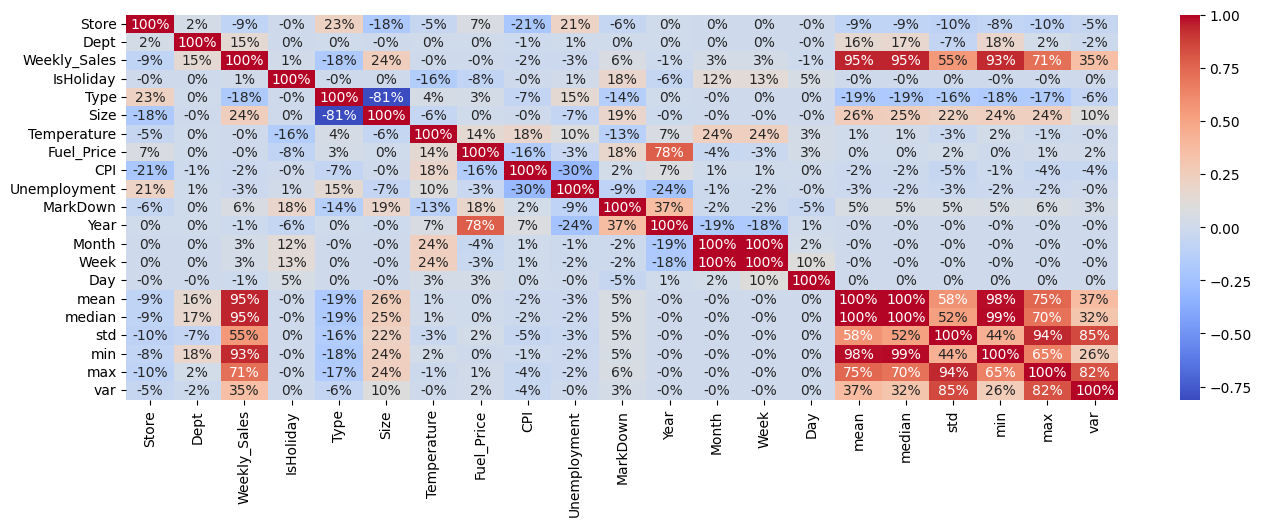

In [ ]:
##Lets plot the correlation matrix in percentage since, the values are very less
plt. figure(figsize=(16,5))
sns.heatmap(correlation, annot=True, fmt='.0%', cmap="coolwarm")
plt.show()


**The correlation matrix shows some of the features having a strong correlation or dependency with weekly sales. The statistical values show a strong correlation with weekly sales along with size**

###**Let's visualize some of the relationship and or insights**

In [ ]:
## Week vs weekly sales of the stores

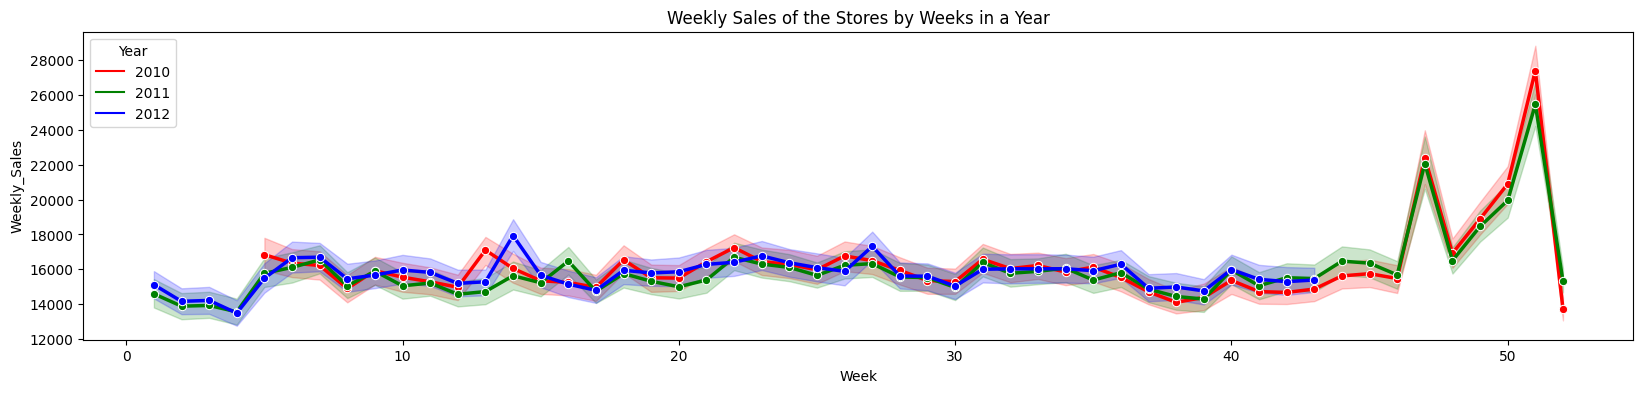

In [ ]:
## Display the graph
custom_palette = ["red", "green", "blue"]
plt.figure(figsize=(20, 4))
sns.lineplot(x="Week", y="Weekly_Sales", hue="Year", data=final_data, linewidth=2.5, palette=custom_palette, marker="o")
plt.title("Weekly Sales of the Stores by Weeks in a Year")
plt.legend(title='Year')
plt.show()

**The plot shows the highest sales during the last weeks of the year, which is supposed to be holiday months like October, November, and December when most of the festivals are. The least sales seem to be during January and February weeks when there is snowfall and the weather is bad. This is also my personal experience from working in a convenience store.**

In [ ]:
## Let's plot weekly, monthly, and quarterly sales for all the years

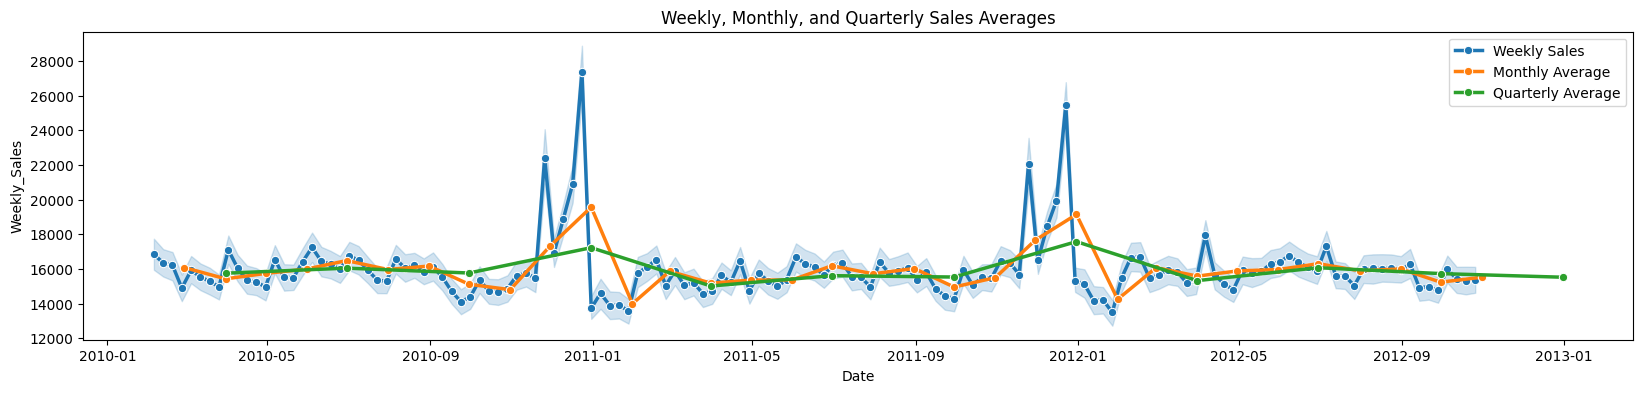

In [ ]:
# Calculate monthly and quarterly averages
monthly_avg = final_data.resample('M', on='Date')['Weekly_Sales'].mean()
quarterly_avg = final_data.resample('Q', on='Date')['Weekly_Sales'].mean()

# Plotting
plt.figure(figsize=(20, 4))
sns.lineplot(x="Date", y="Weekly_Sales", data=final_data, linewidth=2.5, marker="o", label='Weekly Sales')
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, linewidth=2.5, marker="o", label='Monthly Average')
sns.lineplot(x=quarterly_avg.index, y=quarterly_avg.values, linewidth=2.5, marker="o", label='Quarterly Average')

plt.title("Weekly, Monthly, and Quarterly Sales Averages")
plt.legend()
plt.show()

In [ ]:
## Lest plot two separate plots for temperature over time and sales over time

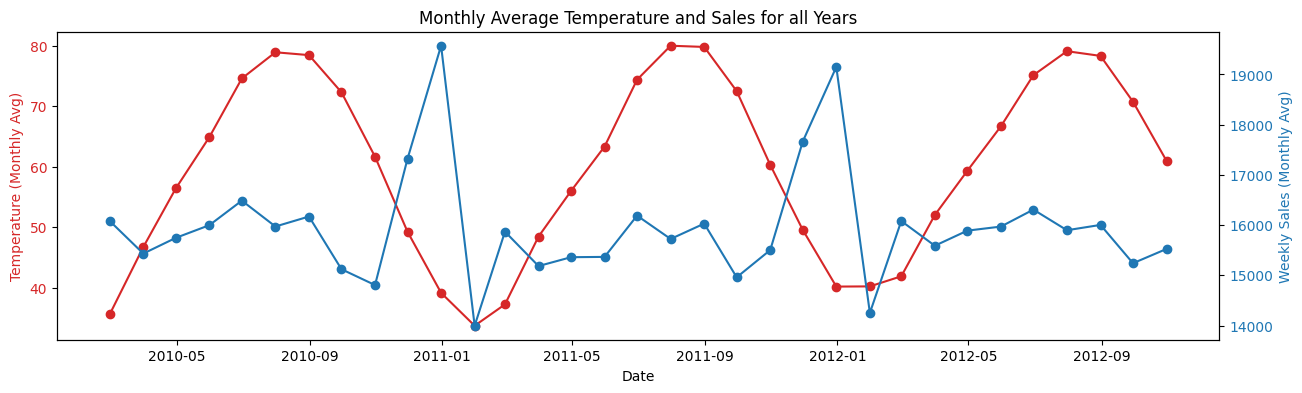

In [ ]:
# Calculate monthly averages for temperature and sales
monthly_avg_temp = final_data.resample('M', on='Date')['Temperature'].mean()
monthly_avg_sales = final_data.resample('M', on='Date')['Weekly_Sales'].mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 4))

# Plotting monthly average Temperature over Time on the first y-axis (left)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (Monthly Avg)', color=color)
ax1.plot(monthly_avg_temp.index, monthly_avg_temp.values, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Monthly Average Sales on the right
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Weekly Sales (Monthly Avg)', color=color)
ax2.plot(monthly_avg_sales.index, monthly_avg_sales.values, color=color, marker="o")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Monthly Average Temperature and Sales for all Years")
plt.show()

In [ ]:
## Weekly sales by department for all the weeks

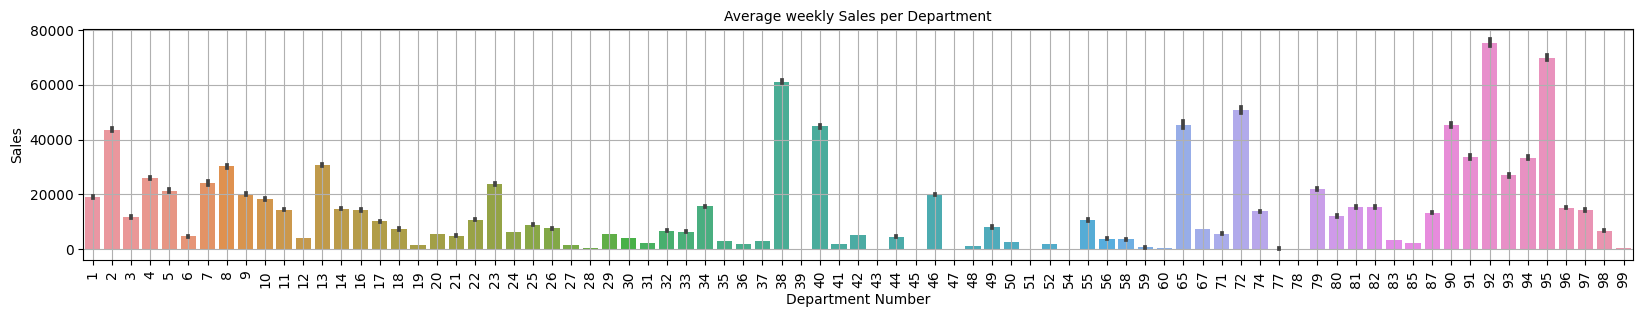

In [ ]:
## Display the bar plot
plt.figure(figsize=(20, 3))
ax = sns.barplot(x='Dept', y='Weekly_Sales', data=final_data)
plt.grid()
plt.title('Average weekly Sales per Department', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.xlabel('Department Number', fontsize=10)

# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


In [ ]:
## Weekly sales by stores for all the weeks


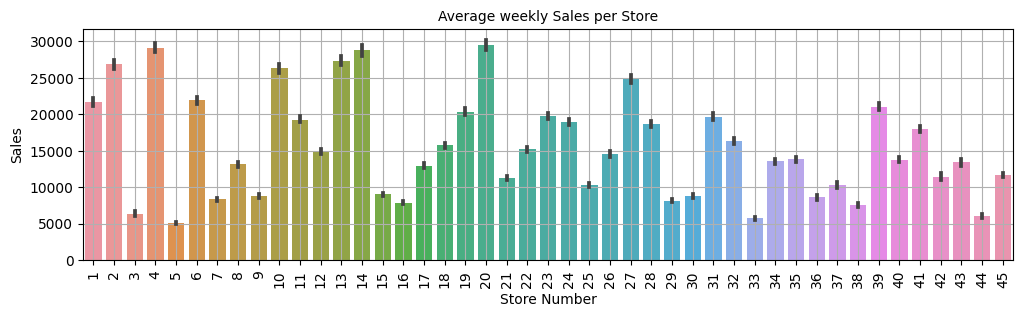

In [ ]:
## Display the bar plot
plt.figure(figsize=(12, 3))
ax = sns.barplot(x='Store', y='Weekly_Sales', data=final_data)
plt.grid()
plt.title('Average weekly Sales per Store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.xlabel('Store Number', fontsize=10)

# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [ ]:
# Grouping by 'IsHoliday' and counting unique dates
holiday_counts = final_data.groupby('IsHoliday')['Date'].nunique()

print("Number of weeks for holidays and non-holidays:")
print(holiday_counts)

Number of weeks for holidays and non-holidays:
IsHoliday
0    133
1     10
Name: Date, dtype: int64


In [ ]:
# Calculate total sales for holiday and non-holiday periods
holiday_sales = final_data[final_data['IsHoliday'] == True]['Weekly_Sales'].sum()
non_holiday_sales = final_data[final_data['IsHoliday'] == False]['Weekly_Sales'].sum()

print(f"Total Sales for Holidays: {holiday_sales}")
print(f"Total Sales for Non-Holidays: {non_holiday_sales}")

Total Sales for Holidays: 505296689.31000006
Total Sales for Non-Holidays: 6231919139.05


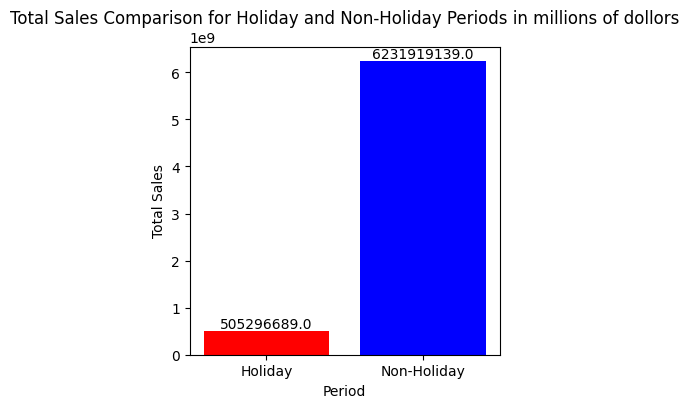

In [ ]:
# Create a bar plot

plt.figure(figsize=(4, 4))
bars = plt.bar(['Holiday', 'Non-Holiday'], [holiday_sales, non_holiday_sales], color=['red', 'blue'])
plt.title('Total Sales Comparison for Holiday and Non-Holiday Periods in millions of dollors')
plt.xlabel('Period')
plt.ylabel('Total Sales')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 0), va='bottom', ha='center')

plt.show()

**Lets evaluate some outliers in the data set for sales values**

In [ ]:
## lest check the negative sales values
sales_negative =final_data[final_data['Weekly_Sales'] < 0]
len(sales_negative)

1279

In [ ]:
sales_negative.head(6).sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,...,Year,Month,Week,Day,mean,median,std,min,max,var
6048,1,47,2010-02-19,-863.00,0,1,151315,39.93,2.514,211.289143,...,2010,2,7,19,-116.454545,0.00,291.394958,-863.00,224.00,8.491102e+04
6049,1,47,2010-03-12,-698.00,0,1,151315,57.79,2.667,211.380643,...,2010,3,10,12,-116.454545,0.00,291.394958,-863.00,224.00,8.491102e+04
6051,1,47,2010-10-08,-58.00,0,1,151315,63.93,2.633,211.746754,...,2010,10,40,8,-116.454545,0.00,291.394958,-863.00,224.00,8.491102e+04
6056,1,47,2011-04-08,-298.00,0,1,151315,67.84,3.622,215.074394,...,2011,4,14,8,-116.454545,0.00,291.394958,-863.00,224.00,8.491102e+04
2384,1,18,2012-05-04,-1.27,0,1,151315,75.55,3.749,221.671800,...,2012,5,18,4,7765.304425,2303.36,11435.692635,-1.27,53845.12,1.307751e+08
846,1,6,2012-08-10,-139.65,0,1,151315,85.05,3.494,221.958433,...,2012,8,32,10,4801.780140,4132.61,3317.432691,-139.65,28497.52,1.100536e+07


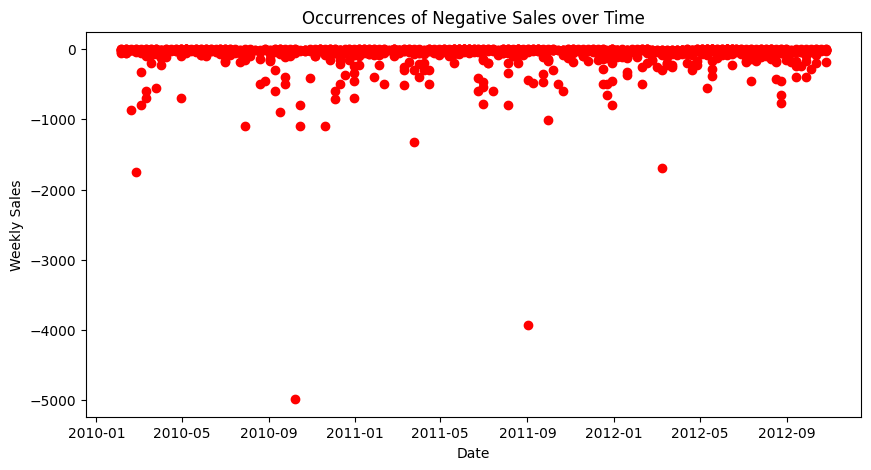

In [ ]:
# Plotting negative sales occurrences over time
plt.figure(figsize=(10, 5))
plt.scatter(sales_negative['Date'], sales_negative['Weekly_Sales'], color='red', label='Negative Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Occurrences of Negative Sales over Time')
plt.show()

In [ ]:
## lets check sales positive values
sales_positive_odd =final_data[final_data['Weekly_Sales'] > 250000]
len(sales_positive_odd)

62

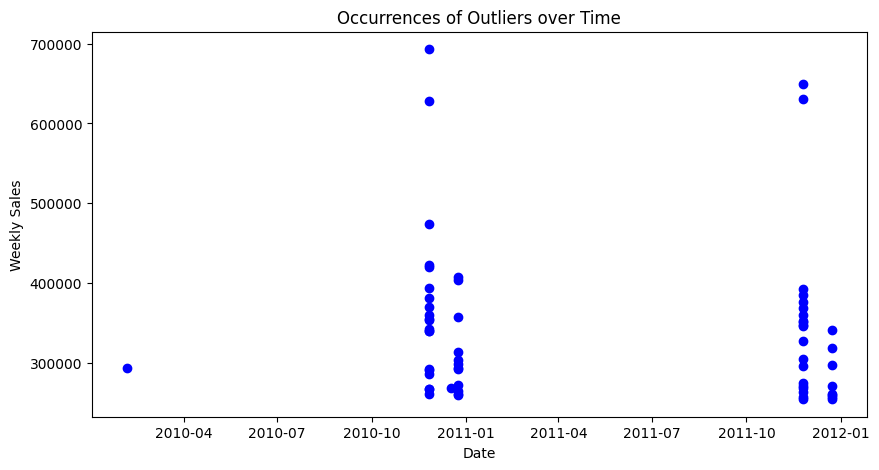

In [ ]:
## Plotting outliers occurrences over time
plt.figure(figsize=(10, 5))
plt.scatter(sales_positive_odd['Date'], sales_positive_odd['Weekly_Sales'], color='blue', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Occurrences of Outliers over Time')
plt.show()

In [ ]:
## for regular sales greater than  or equal tozero and smaller or equal to 250,000
sales_positive_regular =final_data[(final_data['Weekly_Sales'] >= 0) & (final_data['Weekly_Sales'] <= 250000)]
len(sales_positive_regular)

420192

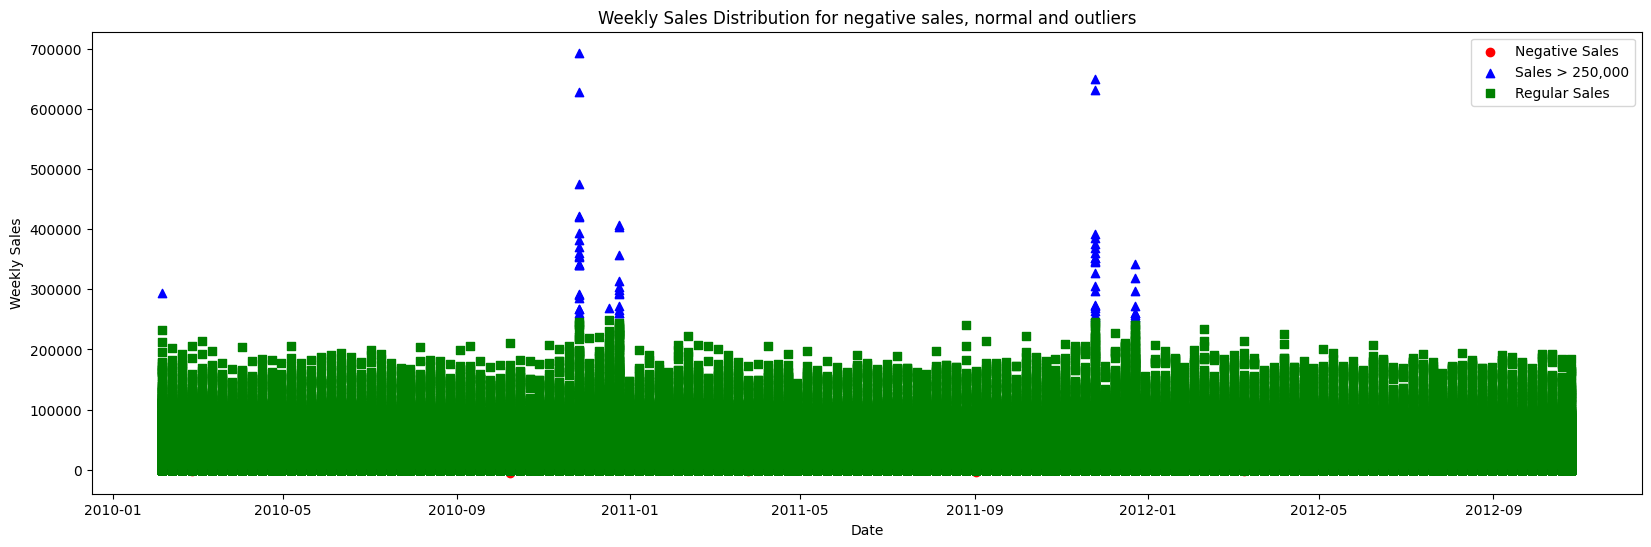

In [ ]:
# Create plots for each category
plt.figure(figsize=(20, 6))

# Plotting negative sales
plt.scatter(sales_negative['Date'], sales_negative['Weekly_Sales'], color='red', label='Negative Sales', marker='o')

# Plotting sales > 250,000
plt.scatter(sales_positive_odd['Date'], sales_positive_odd['Weekly_Sales'], color='blue', label='Sales > 250,000', marker='^')

# Plotting regular sales (0-250,000)
plt.scatter(sales_positive_regular['Date'], sales_positive_regular['Weekly_Sales'], color='green', label='Regular Sales', marker='s')

plt.title('Weekly Sales Distribution for negative sales, normal and outliers')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
## Drop the negative sales from the data as negative sales seem to be very less and do not follow any pattern
## Also, the outliers seem to have a pattern during festival seasons and are very few  0.0015% so, let's remove them so, that model can have generalize sales
general_sales_data = final_data[(final_data['Weekly_Sales'] > 0) & (final_data['Weekly_Sales'] <= 250000)]
general_sales_data.shape

(420119, 22)

##**Since we removed The outliers and negative sales from the data now, we need to re-calculate the statistical variables again for the updated dataset.**

In [ ]:
## lets drop mean , median, max, min, var, std from general_sales_data
general_sales_data.drop(["mean","median", "max", "min", "var", "std"], axis=1, inplace=True)


In [ ]:
general_sales_data.shape

(420119, 16)

In [ ]:
#Outlier Detection and Abnormalities
stat_data= general_sales_data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['mean', 'median', 'max', 'min', 'std', "var"]).reset_index()
stat_data.shape

(3292, 8)

In [ ]:
Modeling_data = pd.merge(left=general_sales_data,right=stat_data,on=['Store', 'Dept'],how ='left')
Modeling_data.dropna(inplace=True)
Modeling_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,...,Year,Month,Week,Day,mean,median,max,min,std,var
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,...,2010,2,5,5,22513.322937,18535.48,57592.12,14537.37,9854.349032,9.710819e+07
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,...,2010,2,6,12,22513.322937,18535.48,57592.12,14537.37,9854.349032,9.710819e+07
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,211.289143,...,2010,2,7,19,22513.322937,18535.48,57592.12,14537.37,9854.349032,9.710819e+07
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,211.319643,...,2010,2,8,26,22513.322937,18535.48,57592.12,14537.37,9854.349032,9.710819e+07
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,211.350143,...,2010,3,9,5,22513.322937,18535.48,57592.12,14537.37,9854.349032,9.710819e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420114,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,...,2012,9,39,28,561.239037,619.41,1504.71,2.00,371.286705,1.378538e+05
420115,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,...,2012,10,40,5,561.239037,619.41,1504.71,2.00,371.286705,1.378538e+05
420116,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,...,2012,10,41,12,561.239037,619.41,1504.71,2.00,371.286705,1.378538e+05
420117,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,...,2012,10,42,19,561.239037,619.41,1504.71,2.00,371.286705,1.378538e+05


In [ ]:
Modeling_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
MarkDown        0
Year            0
Month           0
Week            0
Day             0
mean            0
median          0
max             0
min             0
std             0
var             0
dtype: int64

In [ ]:
## we can see that we have no null values for modeling data now let's do feature selection


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = Modeling_data.drop(columns=['Weekly_Sales', "Date"], axis=1)
y = Modeling_data['Weekly_Sales']

# Initialize the model and fit
model = RandomForestRegressor()  # Initialize the model
model.fit(X, y)

# Retrieve feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

In [ ]:
print("These are the important features based on metrics\n", feature_importances.sort_values(ascending=False))

These are the important features based on metrics
 mean            0.892622
median          0.033432
Week            0.015057
max             0.012259
Day             0.008046
Temperature     0.006572
min             0.005318
CPI             0.005224
Fuel_Price      0.003686
Unemployment    0.003469
std             0.003145
var             0.002974
Dept            0.002043
Month           0.002023
MarkDown        0.001295
Size            0.000885
Store           0.000708
IsHoliday       0.000659
Year            0.000437
Type            0.000146
dtype: float64


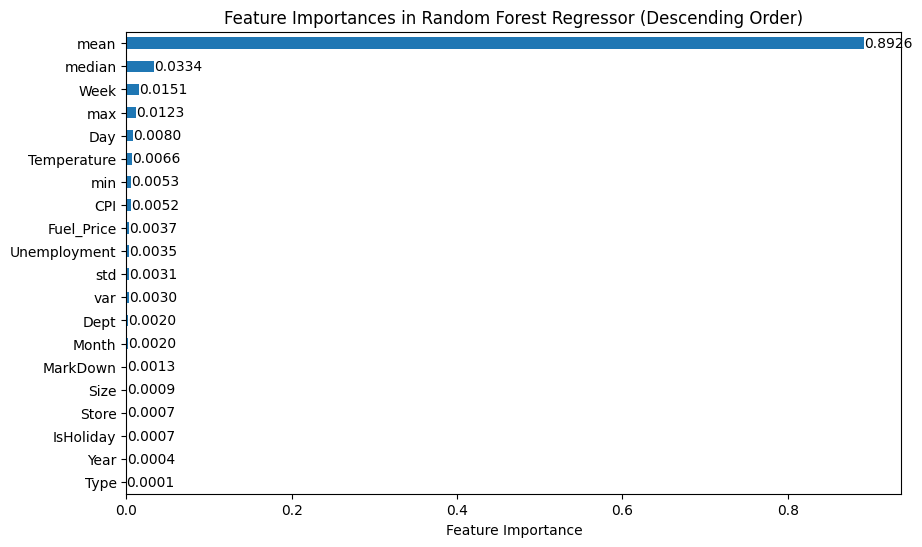

In [ ]:
# Retrieve feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=True)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')  # Plotting all features in descending order of importance
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest Regressor (Descending Order)')
# Annotate bars with their respective values
for index, value in enumerate(sorted_importances):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.show()

###**Lets set a threshold for features and remove features with importance values less than 0.001 also std and var have the same values so, lets remove one of them .**


In [ ]:
## dataset after removing less important features
Modeling_final= Modeling_data.drop(columns=['Size', 'IsHoliday', 'Store', 'Year', 'Type', "Date","var"], axis=1)
Modeling_final.shape

(420110, 15)

In [ ]:
## Updated correlation after removal of negative and outliers
correlation1=Modeling_final.corr()

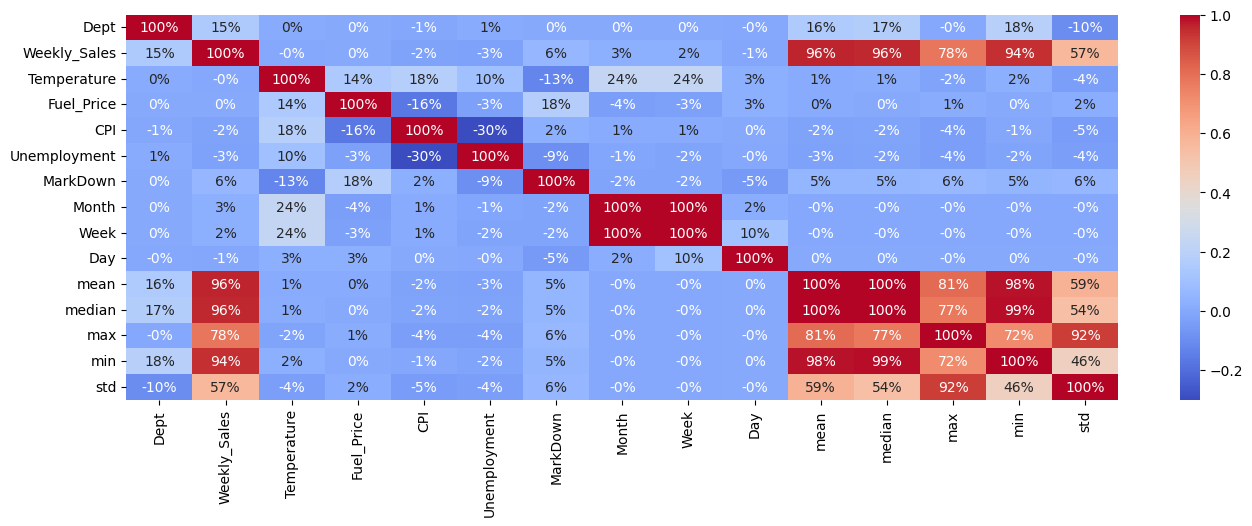

In [ ]:
## Let's plot the correlation matrix in percentage
plt. figure(figsize=(16,5))
sns.heatmap(correlation1, annot=True, fmt='.0%', cmap="coolwarm")
plt.show()


##**6.Features optimization or scaling and hyperparameters tuning , 7.Implement the models proposed in the project description which are the Generative Model and Tree-based model, also if possible RNN.**

**We proposed to use the generative model first and the one was the Naive Bayes model. Since NB is a classification-based model it is not applicable for regression tasks like sales prediction. So,Naive Bayes is not applicable for this project. From here we learned that models are based on dataset and their prediction whether they are classification pr regrssion task. Instead of Generative Model we will replace with any other model as a replacement**

In [ ]:
Modeling_final

,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,MarkDown,Month,Week,Day,mean,median,max,min,std
0,1,24924.50,42.31,2.572,211.096358,8.106,0.00,2,5,5,22513.322937,18535.48,57592.12,14537.37,9854.349032
1,1,46039.49,38.51,2.548,211.242170,8.106,0.00,2,6,12,22513.322937,18535.48,57592.12,14537.37,9854.349032
2,1,41595.55,39.93,2.514,211.289143,8.106,0.00,2,7,19,22513.322937,18535.48,57592.12,14537.37,9854.349032
3,1,19403.54,46.63,2.561,211.319643,8.106,0.00,2,8,26,22513.322937,18535.48,57592.12,14537.37,9854.349032
4,1,21827.90,46.50,2.625,211.350143,8.106,0.00,3,9,5,22513.322937,18535.48,57592.12,14537.37,9854.349032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420114,98,508.37,64.88,3.997,192.013558,8.684,9468.01,9,39,28,561.239037,619.41,1504.71,2.00,371.286705
420115,98,628.10,64.89,3.985,192.170412,8.667,0.00,10,40,5,561.239037,619.41,1504.71,2.00,371.286705
420116,98,1061.02,54.47,4.000,192.327265,8.667,0.00,10,41,12,561.239037,619.41,1504.71,2.00,371.286705
420117,98,760.01,56.47,3.969,192.330854,8.667,0.00,10,42,19,561.239037,619.41,1504.71,2.00,371.286705


In [ ]:
### Splitting the data into train and test and validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
X= Modeling_final.drop(columns=['Weekly_Sales'], axis=1)
y= Modeling_final['Weekly_Sales']

# Splitting the data into training (70%), validation (15%), and testing (15%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.50, random_state=42)

###**Taking the whole test dataset for hyperparameter tunning and cross validation is crashing the notebook as it is asking for more than 51 GB of RAM, which is not available to me at this time. Also I tried with sample set with 0.1 of total  set and also with 0.01 of total set, still I ran out of memory so, I tried manual hyperparameter tunning for few models and for few i was able to do it.This may have happened as i have 420,000 rows and 16 columns, which is a very heavy dataset.**

###**Also, we are not scaling the features for tree based models. We will only do for RNN**

##**Tree-based Models**
##**1.Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:

'''
# Fit the model with adjusted hyperparameters
random_forest_regressor.fit(X_train, y_train)

# Regularization via cross-validation
# Use cross-validation to evaluate model performance and tune hyperparameters
# This helps prevent overfitting by validating on different subsets of data
# Example using GridSearchCV or RandomizedSearchCV
# Perform hyperparameter search using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 8, 10],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters found
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for predictions
best_estimator.fit(X_train, y_train)
y_pred_test = best_estimator.predict(X_test)
'''

"\n# Fit the model with adjusted hyperparameters\nrandom_forest_regressor.fit(X_train, y_train)\n\n# Regularization via cross-validation\n# Use cross-validation to evaluate model performance and tune hyperparameters\n# This helps prevent overfitting by validating on different subsets of data\n# Example using GridSearchCV or RandomizedSearchCV\n# Perform hyperparameter search using GridSearchCV\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    'n_estimators': [10, 50, 100],\n    'max_depth': [5, 8, 10],\n    'min_samples_split': [3, 5, 7],\n    'min_samples_leaf': [1, 2, 3],\n    'max_features': ['sqrt', 'log2']\n}\n\ngrid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')\ngrid_search.fit(X_train, y_train)\n\n# Best hyperparameters found\nbest_params = grid_search.best_params_\nbest_estimator = grid_search.best_estimator_\n\n# Use the best estimator for predictions\nbest_estimator.fit(X_train, y

In [ ]:
## These parameters are obtained from the above grid search cross-validation.
'''
best_params= ({'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100})
  '''

"\nbest_params= ({'max_depth': 10,\n  'max_features': 'sqrt',\n  'min_samples_leaf': 1,\n  'min_samples_split': 5,\n  'n_estimators': 100})\n  "

In [ ]:
# Create a random forest regressor
# Create a Random Forest Regressor with adjusted hyperparameters
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', random_state=42)
# Fit the model to the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train1 = random_forest_regressor.predict(X_train)
# Make predictions on the validation data
y_pred_val1 = random_forest_regressor.predict(X_val)


In [ ]:
# Make predictions on the test data
y_pred1 = random_forest_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
## Evaluation metrics on training set
train_mse1 = mean_squared_error(y_train, y_pred_train1)
train_r21 = r2_score(y_train, y_pred_train1)
train_mae1 = mean_absolute_error(y_train, y_pred_train1)
train_rmse1 = sqrt(train_mse1)

# Evaluation metrics on validation set
val_mse1 = mean_squared_error(y_val, y_pred_val1)
val_r21 = r2_score(y_val, y_pred_val1)
val_mae1 = mean_absolute_error(y_val, y_pred_val1)
val_rmse1 = sqrt(val_mse1)

# Evaluation metrics on test set
test_mse1 = mean_squared_error(y_test, y_pred1)
test_r21 = r2_score(y_test, y_pred1)
test_mae1 = mean_absolute_error(y_test, y_pred1)
test_rmse1 = sqrt(test_mse1)

In [ ]:
## Train metrics
train_mse1,train_r21,train_mae1,train_rmse1

(19188975.16233373, 0.9614779541819891, 2124.0985664792993, 4380.522247670217)

In [ ]:
## Validation metrics
val_mse1,val_r21,val_mae1,val_rmse1

(23304061.3159504, 0.9538707665189862, 2213.4674421262475, 4827.428022865841)

In [ ]:
## Test matrics
test_mse1,test_r21,test_mae1,test_rmse1

(23144745.219863325, 0.9532657379374445, 2204.055434852736, 4810.898587567953)

In [ ]:
Compare_regression = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
Compare_regression

,Actual,Predicted
384727,45577.61,53504.890975
316271,10.50,123.822708
249401,5806.48,6268.328394
147385,2785.50,2174.329839
256422,43268.49,44246.392117
...,...,...
337466,9713.60,10786.387404
304714,14828.49,15437.064733
102976,2416.59,1961.894845
364091,4862.18,6018.214427


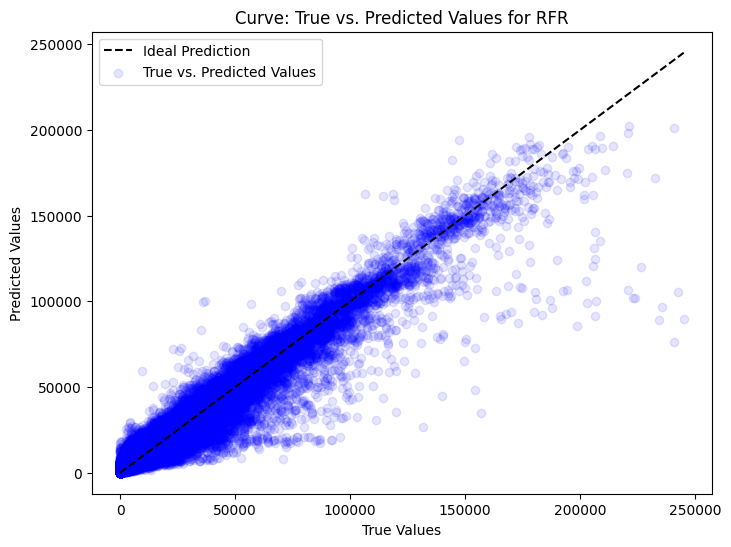

In [ ]:
# Calculate limits for the plot
min_val = min(np.min(y_test), np.min(y_pred1))
max_val = max(np.max(y_test), np.max(y_pred1))

# Plotting true vs. predicted values with a curve
plt.figure(figsize=(8, 6))

# Plotting the identity line (y = x)
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='Ideal Prediction')

# Plotting the relationship between true and predicted values
plt.scatter(y_test, y_pred1, alpha=0.1, color='blue', label='True vs. Predicted Values')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Curve: True vs. Predicted Values for RFR')
plt.legend()
plt.show()

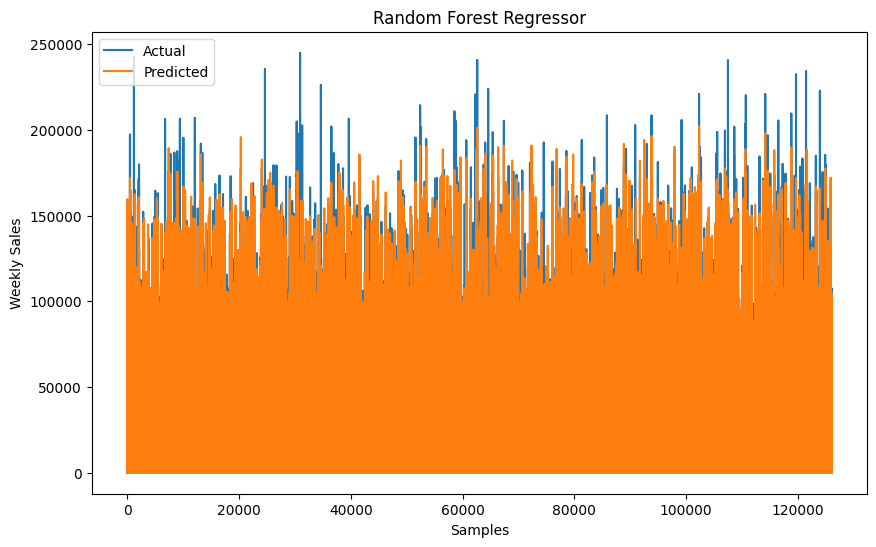

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred1, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.title("Random Forest Regressor")
plt.legend()
plt.show()

##**LGM Model**

In [ ]:
## Best hyper parameter tunning using cross-validation

In [ ]:
'''
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the LightGBM dataset
lgb_train = lgb.Dataset(X_train, label=y_train)

# Define the parameters grid for tuning
param_grid = {
    'num_leaves': [31, 50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [-1, 5, 10, 15],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],

}

# Define the base parameters
base_params = {
    'objective': 'regression',
    'metric': 'mse',
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'verbosity': -1
}

# Create a LightGBM regressor
lgb_reg = lgb.LGBMRegressor(**base_params)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform Grid Search Cross Validation
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative MSE Score:", best_score)
'''

'\nimport lightgbm as lgb\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the LightGBM dataset\nlgb_train = lgb.Dataset(X_train, label=y_train)\n\n# Define the parameters grid for tuning\nparam_grid = {\n    \'num_leaves\': [31, 50, 100, 150],\n    \'learning_rate\': [0.05, 0.1, 0.2],\n    \'max_depth\': [-1, 5, 10, 15],\n    \'min_child_samples\': [20, 30, 50],\n    \'subsample\': [0.8, 0.9, 1.0],\n    \'colsample_bytree\': [0.8, 0.9, 1.0],\n\n}\n\n# Define the base parameters\nbase_params = {\n    \'objective\': \'regression\',\n    \'metric\': \'mse\',\n    \'feature_fraction\': 0.8,\n    \'bagging_fraction\': 0.8,\n    \'bagging_freq\': 5,\n    \'max_depth\': -1,\n    \'min_data_in_leaf\': 20,\n    \'verbosity\': -1\n}\n\n# Create a LightGBM regressor\nlgb_reg = lgb.LGBMRegressor(**base_params)\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=lgb_reg,\n    param_grid=param_grid,\n    scoring=\'neg_mean_squared_error\',\n    cv=5,\n    verbose=1

In [ ]:
import lightgbm as lgb
# Create LightGBM datasets for training and testing
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)
val_data= lgb.Dataset(X_val, label=y_val)

# Train the LightGBM model
# Assuming 'train_data' is your LightGBM Dataset
params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'verbosity': -1
}

num_boost_round = 1000

# Train the model on the entire training set
model = lgb.train(params, train_data, num_boost_round=num_boost_round)


# Make predictions on the training data
y_pred_train2 = random_forest_regressor.predict(X_train)
#predict validation set
y_pred_val2 = model.predict(X_val)

# Predict on the test set
y_pred2 = model.predict(X_test)



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
## Evaluation metrics on training set
train_mse2 = mean_squared_error(y_train, y_pred_train2)
train_r22 = r2_score(y_train, y_pred_train2)
train_mae2 = mean_absolute_error(y_train, y_pred_train2)
train_rmse2 = sqrt(train_mse2)

# Evaluation metrics on validation set
val_mse2 = mean_squared_error(y_val, y_pred_val2)
val_r22 = r2_score(y_val, y_pred_val2)
val_mae2 = mean_absolute_error(y_val, y_pred_val2)
val_rmse2 = sqrt(val_mse2)

# Evaluation metrics on test set
test_mse2 = mean_squared_error(y_test, y_pred2)
test_r22 = r2_score(y_test, y_pred2)
test_mae2 = mean_absolute_error(y_test, y_pred2)
test_rmse2 = sqrt(test_mse2)

In [ ]:
train_mse2, train_r22, train_mae2, train_rmse2

(19188975.16233373, 0.9614779541819891, 2124.0985664792993, 4380.522247670217)

In [ ]:
val_mse2, val_r22, val_mae2, val_rmse2

(10235171.537900997, 0.9797399856107095, 1619.4572611277652, 3199.245463840028)

In [ ]:
test_mse2, test_r22, test_mae2, test_rmse2

(10212537.853283044,
 0.9793786703709536,
 1617.2525877064882,
 3195.7061587829135)

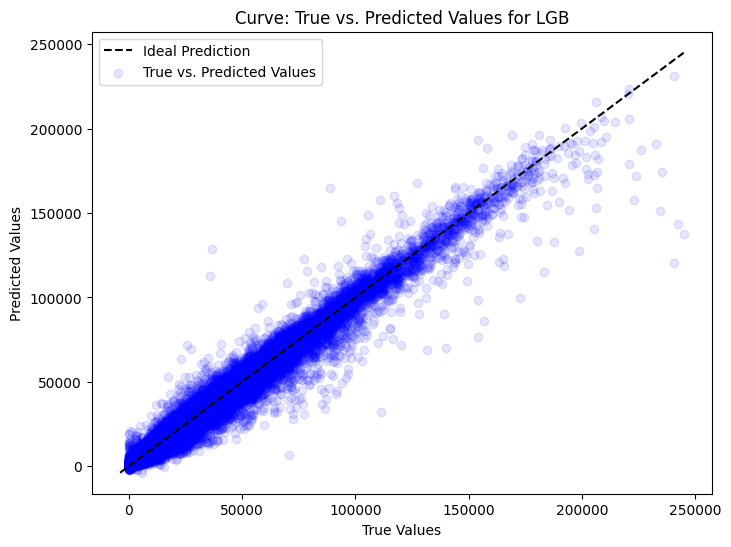

In [ ]:
# Calculate limits for the plot
min_val = min(np.min(y_test), np.min(y_pred2))
max_val = max(np.max(y_test), np.max(y_pred2))

# Plotting true vs. predicted values with a curve
plt.figure(figsize=(8, 6))

# Plotting the identity line (y = x)
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='Ideal Prediction')

# Plotting the relationship between true and predicted values
plt.scatter(y_test, y_pred2, alpha=0.1, color='blue', label='True vs. Predicted Values')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Curve: True vs. Predicted Values for LGB')
plt.legend()
plt.show()

In [ ]:
Compare_lgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
Compare_lgb

,Actual,Predicted
384727,45577.61,51652.610579
316271,10.50,243.309995
249401,5806.48,6175.015329
147385,2785.50,2681.168826
256422,43268.49,42384.408923
...,...,...
337466,9713.60,10318.022663
304714,14828.49,14852.812021
102976,2416.59,1727.061716
364091,4862.18,6694.762688


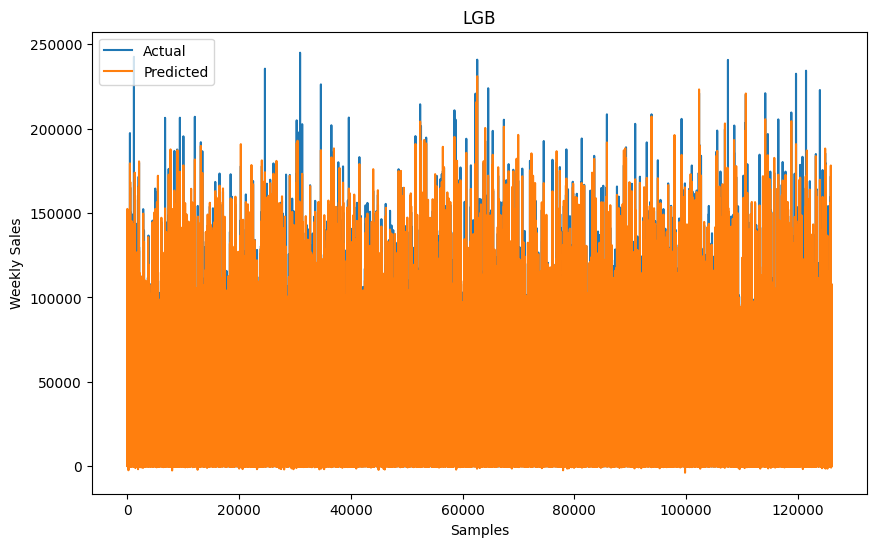

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred2, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.title("LGB")
plt.legend()
plt.show()

##**XGBoost Model**

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize XGBRegressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params
'''

"\nfrom sklearn.model_selection import GridSearchCV\nimport xgboost as xgb\n\n# Define parameter grid\nparam_grid = {\n    'learning_rate': [0.01, 0.1, 0.2],\n    'max_depth': [3, 5, 7, 10],\n    'gamma': [0, 0.1, 0.2],\n    'subsample': [0.6, 0.8, 1.0],\n    'colsample_bytree': [0.6, 0.8, 1.0],\n}\n\n# Initialize XGBRegressor\nxgb_reg = xgb.XGBRegressor(objective='reg:squarederror')\n\n# Perform Grid Search\ngrid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\nbest_params\n"

In [ ]:
import xgboost as xgb
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dval= xgb.DMatrix(X_val, label=y_val)

# Parameters for XGBoost model (adjust as needed)
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.01,
    'max_depth': 5,
    'reg_lambda': 1.0,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'reg_alpha': 0.0

}
num_boost_round = 1000
# Train the XGBoost model with early stopping
model = xgb.train(params, dtrain, num_boost_round=num_boost_round,
                  evals=[(dtrain, 'train'), (dval, 'validation')],
                  early_stopping_rounds=10)

##predict on train set
y_train_pred3= model.predict(dtrain)

##predict on val set
y_val_pred3= model.predict(dval)

# Predict on the test set
y_pred3 = model.predict(dtest)





[0]	train-rmse:22113.22796	validation-rmse:22270.22949
[1]	train-rmse:21909.82521	validation-rmse:22066.30366
[2]	train-rmse:21708.86194	validation-rmse:21864.82678
[3]	train-rmse:21510.45407	validation-rmse:21665.86276
[4]	train-rmse:21314.29848	validation-rmse:21468.81710
[5]	train-rmse:21120.56319	validation-rmse:21274.16285
[6]	train-rmse:20929.02396	validation-rmse:21081.90766
[7]	train-rmse:20738.77625	validation-rmse:20891.03042
[8]	train-rmse:20549.87862	validation-rmse:20701.56205
[9]	train-rmse:20364.55369	validation-rmse:20515.51039
[10]	train-rmse:20185.60114	validation-rmse:20336.20680
[11]	train-rmse:20003.11238	validation-rmse:20153.29283
[12]	train-rmse:19822.60356	validation-rmse:19971.77435
[13]	train-rmse:19644.76615	validation-rmse:19793.27161
[14]	train-rmse:19507.19127	validation-rmse:19655.57667
[15]	train-rmse:19382.46473	validation-rmse:19529.94298
[16]	train-rmse:19209.39652	validation-rmse:19356.26516
[17]	train-rmse:19038.07830	validation-rmse:19184.14913
[1

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
## Evaluation metrics on training set
train_mse3 = mean_squared_error(y_train, y_train_pred3)
train_r23 = r2_score(y_train, y_train_pred3)
train_mae3 = mean_absolute_error(y_train, y_train_pred3)
train_rmse3 = sqrt(train_mse3)

# Evaluation metrics on validation set
val_mse3 = mean_squared_error(y_val, y_val_pred3)
val_r23 = r2_score(y_val, y_val_pred3)
val_mae3 = mean_absolute_error(y_val, y_val_pred3)
val_rmse3 = sqrt(val_mse3)

# Evaluation metrics on test set
test_mse3 = mean_squared_error(y_test, y_pred3)
test_r23 = r2_score(y_test, y_pred3)
test_mae3 = mean_absolute_error(y_test, y_pred3)
test_rmse3 = sqrt(test_mse3)

In [ ]:
(train_mse3, train_r23, train_mae3, train_rmse3)

(18697855.332152575, 0.9624638818013811, 2135.6403292249915, 4324.101679210675)

In [ ]:
(val_mse3, val_r23, val_mae3, val_rmse3)

(20511115.497797675, 0.9593992642344126, 2171.3802645438177, 4528.919904104915)

In [ ]:
(test_mse3, test_r23, test_mae3, test_rmse3)

(20344993.338414848, 0.958919044417805, 2161.96373721909, 4510.542466091506)

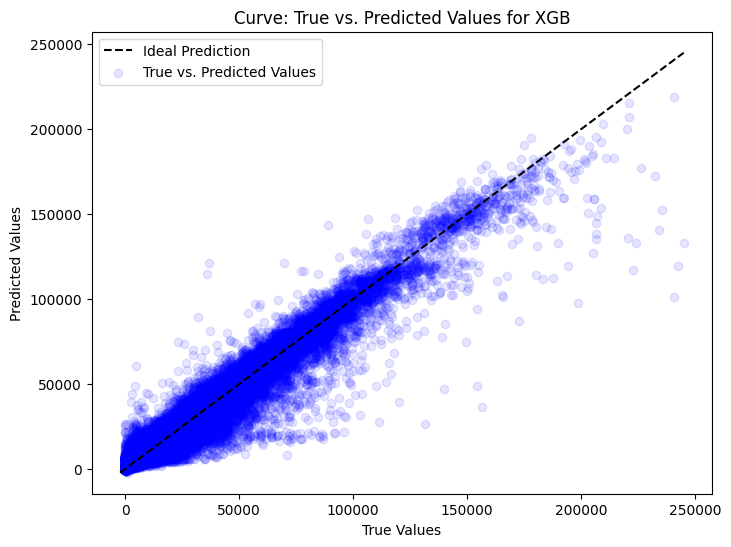

In [ ]:
# Calculate limits for the plot
min_val = min(np.min(y_test), np.min(y_pred3))
max_val = max(np.max(y_test), np.max(y_pred3))

# Plotting true vs. predicted values with a curve
plt.figure(figsize=(8, 6))

# Plotting the identity line (y = x)
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='Ideal Prediction')

# Plotting the relationship between true and predicted values
plt.scatter(y_test, y_pred3, alpha=0.1, color='blue', label='True vs. Predicted Values')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Curve: True vs. Predicted Values for XGB')
plt.legend()
plt.show()

In [ ]:
Compare_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
Compare_xgb

,Actual,Predicted
384727,45577.61,51855.683594
316271,10.50,264.061523
249401,5806.48,6033.274902
147385,2785.50,2689.408447
256422,43268.49,44584.214844
...,...,...
337466,9713.60,11211.355469
304714,14828.49,15471.379883
102976,2416.59,1935.521118
364091,4862.18,6366.100586


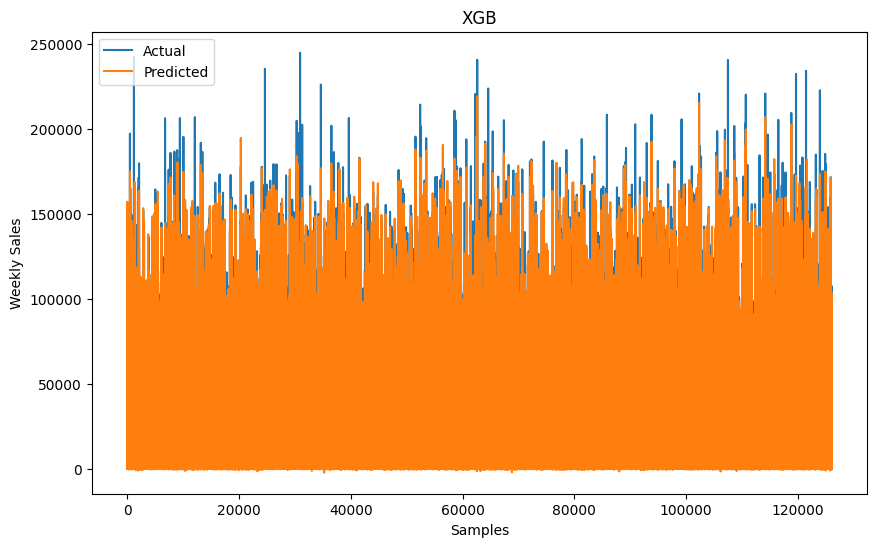

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred3, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.title("XGB")
plt.legend()
plt.show()

##**Cat Boost Model**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
# Create CatBoost model
model = CatBoostRegressor(iterations=500,
                          learning_rate=0.01,
                          depth=5,
                          loss_function='RMSE',
                          random_seed=42)

# Train the CatBoost model
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

##predict on train set
y_train_pred4= model.predict(X_train)

##predict on val set
y_val_pred4= model.predict(X_val)

# Predict on the test set
y_pred4 = model.predict(X_test)



In [ ]:
## Evaluation metrics on training set
train_mse4 = mean_squared_error(y_train, y_train_pred4)
train_r24 = r2_score(y_train, y_train_pred4)
train_mae4 = mean_absolute_error(y_train, y_train_pred4)
train_rmse4 = sqrt(train_mse4)

# Evaluation metrics on validation set
val_mse4 = mean_squared_error(y_val, y_val_pred4)
val_r24 = r2_score(y_val, y_val_pred4)
val_mae4 = mean_absolute_error(y_val, y_val_pred4)
val_rmse4 = sqrt(val_mse4)

# Evaluation metrics on test set
test_mse4 = mean_squared_error(y_test, y_pred4)
test_r24 = r2_score(y_test, y_pred4)
test_mae4 = mean_absolute_error(y_test, y_pred4)
test_rmse4 = sqrt(test_mse4)

In [ ]:
train_mse4, train_r24, train_mae4, train_rmse4

(28113820.55264925, 0.9435612441890942, 2510.106321853318, 5302.246745734232)

In [ ]:
val_mse4, val_r24, val_mae4, val_rmse4

(28860221.14114964, 0.9428726237335044, 2505.284536183607, 5372.170989567406)

In [ ]:
test_mse4, test_r24, test_mae4, test_rmse4

(28444110.60659151, 0.9425651694759675, 2487.953238649589, 5333.30203594279)

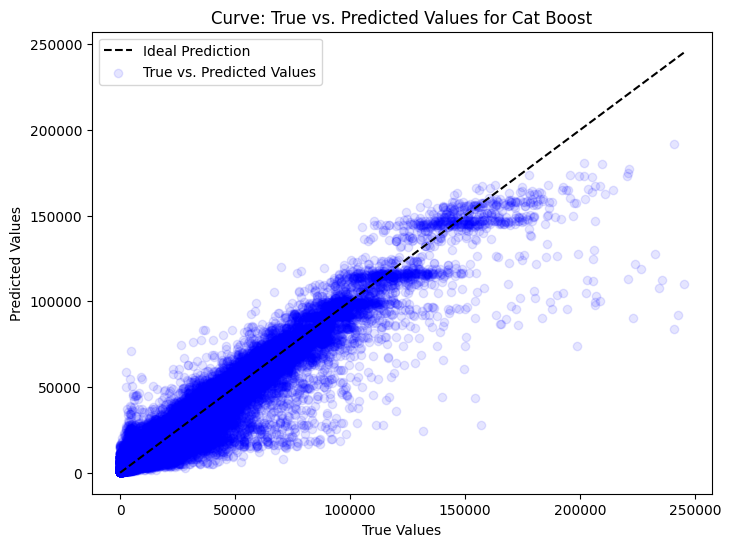

In [ ]:
# Calculate limits for the plot
min_val = min(np.min(y_test), np.min(y_pred4))
max_val = max(np.max(y_test), np.max(y_pred4))

# Plotting true vs. predicted values with a curve
plt.figure(figsize=(8, 6))

# Plotting the identity line (y = x)
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='black', label='Ideal Prediction')

# Plotting the relationship between true and predicted values
plt.scatter(y_test, y_pred4, alpha=0.1, color='blue', label='True vs. Predicted Values')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Curve: True vs. Predicted Values for Cat Boost')
plt.legend()
plt.show()

In [ ]:
Compare_boost = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
Compare_boost

,Actual,Predicted
384727,45577.61,54004.214613
316271,10.50,1097.827844
249401,5806.48,6222.977555
147385,2785.50,2257.884984
256422,43268.49,46174.388793
...,...,...
337466,9713.60,11055.112654
304714,14828.49,15523.616942
102976,2416.59,2090.533383
364091,4862.18,5967.167868


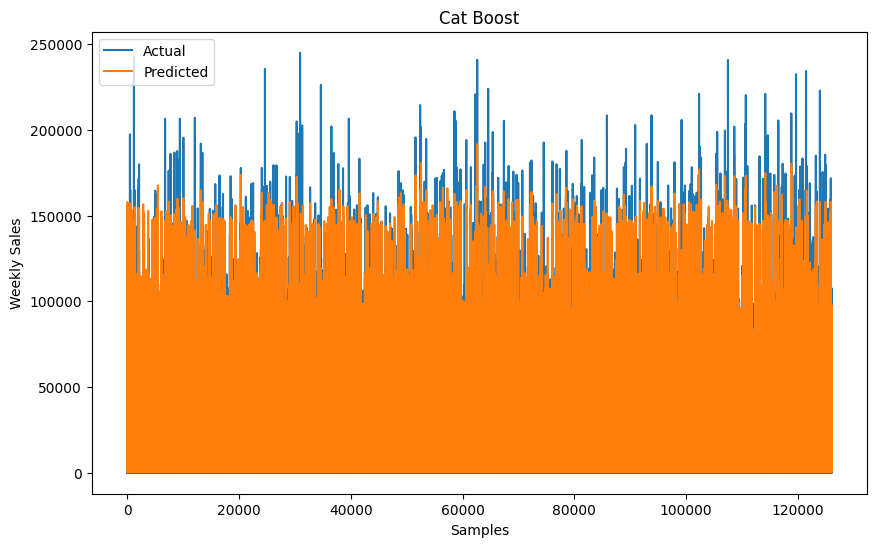

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred4, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.title("Cat Boost")
plt.legend()
plt.show()

In [ ]:
## Lests calculate the average prediction based on all four tree based model

In [ ]:
y_pred_average= (y_pred1+y_pred2+y_pred3+y_pred4)/4


In [ ]:
Compare_avg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_average})
Compare_avg

,Actual,Predicted
384727,45577.61,52754.349940
316271,10.50,432.255518
249401,5806.48,6174.899045
147385,2785.50,2450.698024
256422,43268.49,44347.351169
...,...,...
337466,9713.60,10842.719547
304714,14828.49,15321.218395
102976,2416.59,1928.752766
364091,4862.18,6261.561392


In [ ]:
## Lests calculate the average metrics for the predictions

r2 = r2_score(Compare_avg['Actual'], Compare_avg['Predicted'])
mae = mean_absolute_error(Compare_avg['Actual'], Compare_avg['Predicted'])
mse = mean_squared_error(Compare_avg['Actual'], Compare_avg['Predicted'])
rmse = mean_squared_error(Compare_avg['Actual'], Compare_avg['Predicted'], squared=False)

print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

R-squared (R2): 0.9632691300657228
Mean Absolute Error (MAE): 2040.3752591658442
Mean Squared Error (MSE): 18190650.4738399
Root Mean Squared Error (RMSE): 4265.0498794082


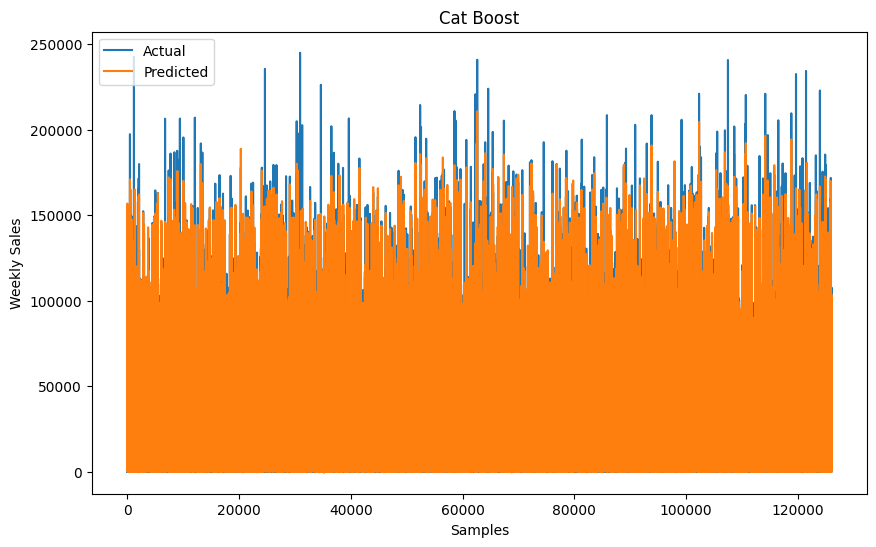

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_average, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.title("Cat Boost")
plt.legend()
plt.show()

#**DEEP LEARNING**

###**Let's apply RNN with Tensorflow and Keras**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
Modeling_final.isnull().sum()

Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
MarkDown        0
Month           0
Week            0
Day             0
mean            0
median          0
max             0
min             0
std             0
dtype: int64

In [ ]:
## Scale
X= Modeling_final.drop(['Weekly_Sales'], axis=1)
y= Modeling_final['Weekly_Sales']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Train-validation-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)



In [ ]:

# Reshape data for RNN input (samples, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_rnn = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))



In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Define a function to create the RNN model
def create_model(units=50, learning_rate=0.001):
    model = Sequential()
    model.add(SimpleRNN(units=units, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dense(units=1))  # Output layer
    optimizer = Adam(learning_rate=learning_rate)  # Updated parameter name
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define the hyperparameters grid for tuning
param_grid = {
    'units': [50, 100],  # Number of units in the RNN layer
    'learning_rate': [0.001, 0.01]  # Learning rate choices
}

best_score = float('inf')
best_params = {}

# Perform grid search manually
for units in param_grid['units']:
    for lr in param_grid['learning_rate']:
        model = create_model(units=units, learning_rate=lr)
        model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_rnn)
        score = mean_squared_error(y_test, y_pred)
        if score < best_score:
            best_score = score
            best_params = {'units': units, 'learning_rate': lr}

print("Best Parameters: ", best_params)
print("Best MSE Score: ", best_score)

3939/3939 [==============================] - 7s 2ms/step
Best Parameters:  {'units': 100, 'learning_rate': 0.01}
Best MSE Score:  37700520.88455607


In [ ]:


# Create RNN model
# Create the RNN model with best parameters
best_units = 50
best_learning_rate = 0.01

model = Sequential()
model.add(SimpleRNN(units=best_units, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(Dense(units=1))  # Output layer

optimizer = Adam(learning_rate=best_learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Fit the model with the best parameters and validate on validation data
history = model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_rnn, y_val))


Epoch 1/10
6433/6433 [==============================] - 19s 3ms/step - loss: 216640928.0000 - val_loss: 52500420.0000
Epoch 2/10
6433/6433 [==============================] - 18s 3ms/step - loss: 42277540.0000 - val_loss: 40772132.0000
Epoch 3/10
6433/6433 [==============================] - 17s 3ms/step - loss: 38579976.0000 - val_loss: 40449060.0000
Epoch 4/10
6433/6433 [==============================] - 18s 3ms/step - loss: 38326900.0000 - val_loss: 40310716.0000
Epoch 5/10
6433/6433 [==============================] - 16s 2ms/step - loss: 38169672.0000 - val_loss: 40145884.0000
Epoch 6/10
6433/6433 [==============================] - 18s 3ms/step - loss: 38045892.0000 - val_loss: 40065424.0000
Epoch 7/10
6433/6433 [==============================] - 17s 3ms/step - loss: 37937496.0000 - val_loss: 39980560.0000
Epoch 8/10
6433/6433 [==============================] - 18s 3ms/step - loss: 37842536.0000 - val_loss: 39936264.0000
Epoch 9/10
6433/6433 [==============================] - 18s 3ms

In [ ]:
# Calculate metrics for training data
train_predictions = model.predict(X_train_rnn)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)

# Calculate metrics for validation data
val_predictions = model.predict(X_val_rnn)
val_mse = mean_squared_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)
val_rmse = mean_squared_error(y_val, val_predictions, squared=False)

# Calculate metrics for test data
test_predictions = model.predict(X_test_rnn)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

# Print metrics
print("Training Metrics:")
print(f"MSE: {train_mse}")
print(f"R-squared: {train_r2}")
print(f"MAE: {train_mae}")
print(f"RMSE: {train_rmse}")

print("\nValidation Metrics:")
print(f"MSE: {val_mse}")
print(f"R-squared: {val_r2}")
print(f"MAE: {val_mae}")
print(f"RMSE: {val_rmse}")

print("\nTest Metrics:")
print(f"MSE: {test_mse}")
print(f"R-squared: {test_r2}")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_rmse}")

3939/3939 [==============================] - 5s 1ms/step
Training Metrics:
MSE: 37653172.765308894
R-squared: 0.9245481392451311
MAE: 2777.1430416858807
RMSE: 6136.218115851888

Validation Metrics:
MSE: 39875618.524034135
R-squared: 0.9214707293332438
MAE: 2782.8435200433532
RMSE: 6314.714445169641

Test Metrics:
MSE: 37916639.61268072
R-squared: 0.9234380782610767
MAE: 2746.435109248487
RMSE: 6157.648870525236


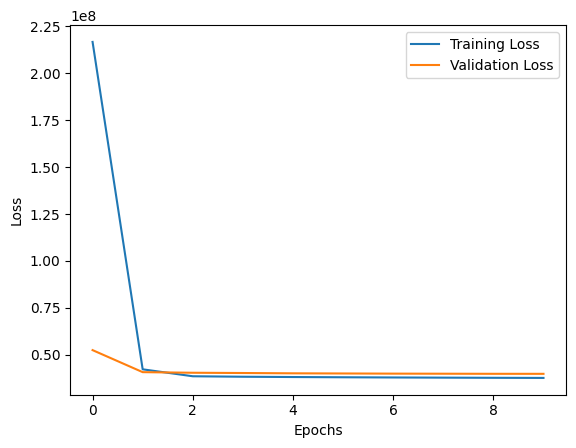

In [ ]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

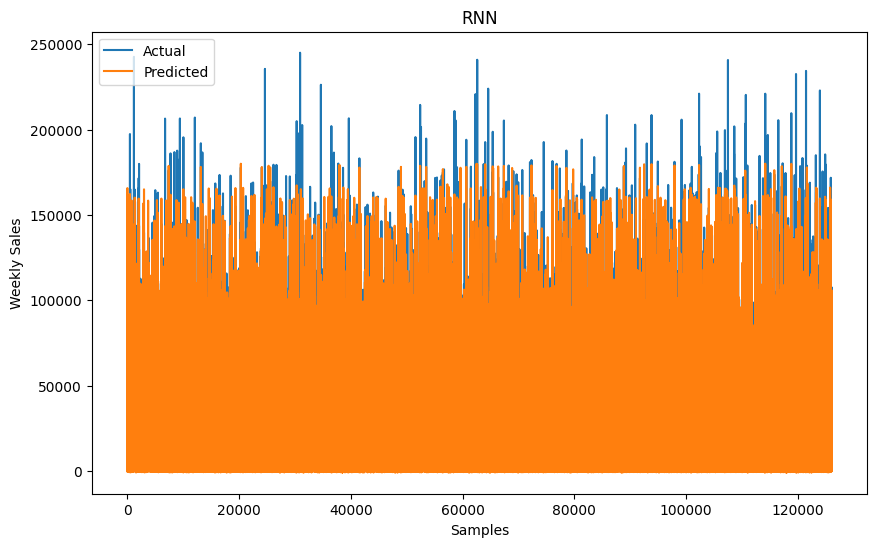

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.title("RNN")
plt.legend()
plt.show()

##**9. Model evaluation and analysis, 10.Compare the results and derive the conclusion,  11.Report writing and presentation**

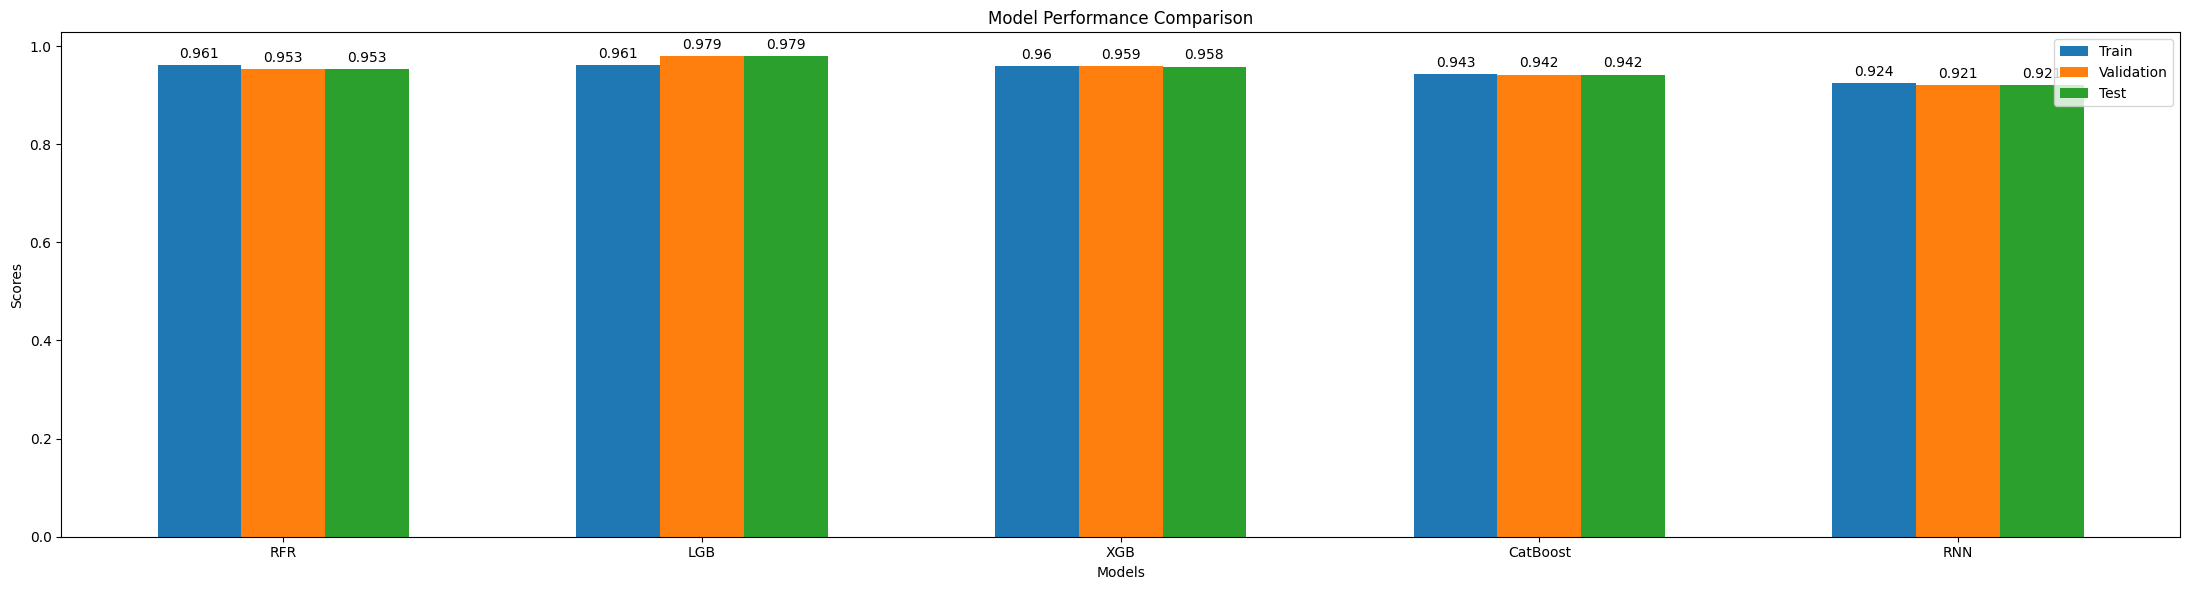

In [ ]:
## Plot a bar chart for all models with their train, Val and test r-square values and do the evaluation
# Scores for each model
scores = {
    'RFR': [0.961, 0.953, 0.953],
    'LGB': [0.961, 0.979, 0.979],
    'XGB': [0.96, 0.959, 0.958],
    'CatBoost': [0.943, 0.942, 0.942],
    'RNN': [0.924, 0.921, 0.921]
}

# Extracting train, validation, and test scores
train_scores = [score[0] for score in scores.values()]
val_scores = [score[1] for score in scores.values()]
test_scores = [score[2] for score in scores.values()]

# Model names
models = list(scores.keys())

# Plotting the bar chart
bar_width = 0.2
index = list(range(len(models)))

plt.figure(figsize=(22, 6))

bar_train = plt.bar(index, train_scores, width=bar_width, label='Train')
bar_val = plt.bar([i + bar_width for i in index], val_scores, width=bar_width, label='Validation')
bar_test = plt.bar([i + 2 * bar_width for i in index], test_scores, width=bar_width, label='Test')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([i + bar_width for i in index], models)
plt.legend()

# Function to add exact values on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 3)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bar_train)
add_labels(bar_val)
add_labels(bar_test)

plt.tight_layout()
plt.show()


In [ ]:
## Evaluation and comparison and also conclusion are in PPt attached with this notebook.
##Thankyou for reading this notebook.

In [ ]:
#######################################################################################THE END#########################################################################